In [1]:
import os
try:
    os.chdir(base_dir) #if the start up file has already been run, this will change the dir back to base
except NameError:
    base_dir = None #if the start up file hasn't been run yet, this will allow us to run this cell without crashing


In [2]:
#%run ./IMPORT_LIBRARIES.ipynb
%run ./startup_file.ipynb #run startup file and install libraries if necessary

# SEASCAPES_Download_and_Visualize

## Author: haley synan

##### *Last run on 2024-06-24*

> *History:* <br>
>> *6/11/2024: originally written <br>
6/12/2024: updated plotting and updated startup file which required some tweaks to this code <br>
6/13/2024: added bar graphs, streamlined code, and added comments* <br>
6/24/2024: updated url2date function to search string for dates
### Objectives: 
* Download seascapes from ERDDAP
* Opening and formatting .nc data 
* Basic plotting of data 

### About the data 
We will be working with the [MBON Seascapes data](https://coastwatch.noaa.gov/cwn/products/seascape-pelagic-habitat-classification.html), which are a global, spatially explicit water mass product. MBON Seascapes are derived from satellite data and are provided at monthly, and 8-day composite temporal resolutions, both with a 5 km spatial resolution. 
Seascapes can be used to predict the occurence of [fisheries](https://besjournals.onlinelibrary.wiley.com/doi/full/10.1111/2041-210X.12532) and [plankton](https://www.nature.com/articles/s41598-022-11809-1) communities in specific seascapes. 

### [Table](https://coastwatch.noaa.gov/cwn/products/seascape-pelagic-habitat-classification.html) of Seascape IDs
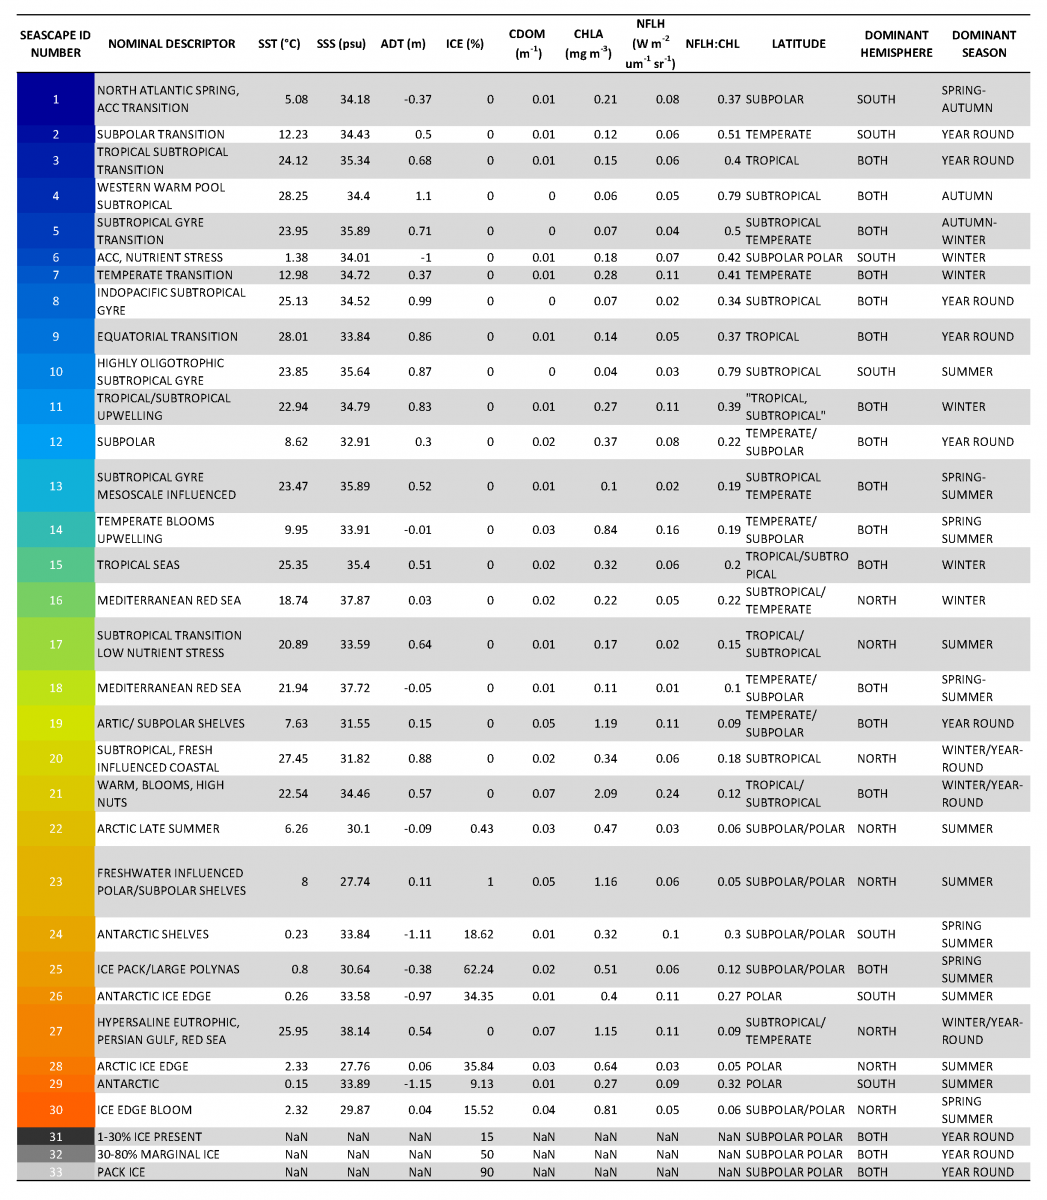


### Step 1: Import python libraries 

Python uses a collection of libraries with built in functions, rather than having the functions all built into the language itself. Each library performs a specific function, and there are some very common libraries you will likely use almost everytime you use Python.
To use a library, we first need to install it. Then everytime you want to use the library, you need to import it.
Here we can see the installation (commented out) and the importing of the libraries we will need for this tutorial. 

**List Variable Names:**
* **base_dir:** base directory 
* **proj_dir:** project directory (**location of startup file**)
* **data_dir:** data directory
* **data_dir_fold:** PROJECT SPECIFIC data directory

We will be running a "startup" file that will import all of our necessary libraries and set up our directories for us. <br> 
<font color='red'>**NOTE: your startup file should be located in your base directory**</font>  <br> 
The cell below allows us to run the startup file multiple times even though we've switched directories

In [ ]:
#import os
#try:
#    os.chdir(base_dir) #if the start up file has already been run, this will change the dir back to base
#except NameError:
#    base_dir = None #if the start up file hasn't been run yet, this will allow us to run this cell without crashing


Run startup file.. This will allow us to install (if necessary) and import libraries, as well as set our working directories

In [ ]:
#%run ./IMPORT_LIBRARIES.ipynb
#%run ./startup_file.ipynb #run startup file and install libraries if necessary

After running the startup file, we are now in the project directory. But we need to make a project specific folder for downloading data. So we're going to switch to our data directory and create a new folder. 

In [ ]:
os.chdir(data_dir) #cd to data directory 
#create new project data folder 
proj_data = '/SEASCAPES' #name of project
data_dir_fold = data_dir+proj_data #path for new folder 
isexist = os.path.exists(data_dir_fold) #check if path exists 
#print(isexist)
if str(isexist) == 'False': #if path doesn't exist already, make it
    os.mkdir(data_dir_fold)


os.chdir(data_dir_fold) #go to project data folder
os.getcwd() #check if in the correct folder

### Step 2: Download data from ERDDAP using command line 
There are several different ways to download Seascapes data. For this tutorial, we will be using the ERDDAP API, found at: https://cwcgom.aoml.noaa.gov/erddap/griddap/noaa_aoml_seascapes_8day.html

First, we need to tell python the URL we want to pull data from. 
* Fill out the API prompts for the data you want: dates, coordinates, etc.
* Use filetype ".nc"
* Click "just generate the URL". Copy the URL and paste down below. 

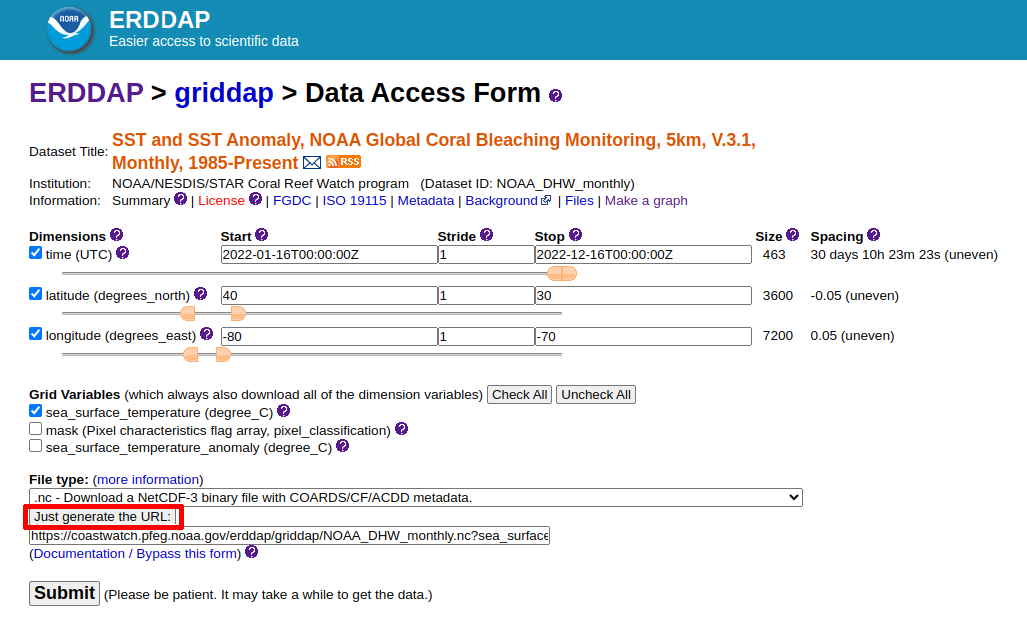 

(image from [github](https://github.com/coastwatch-training/CoastWatch-Tutorials/blob/main/Tutorial1-basics/Python/Tutorial1-basics.ipynb) )

* Set folder location where you want to download data
* Create name for file
* Download data 


In [ ]:
#url = ''.join(['https://cwcgom.aoml.noaa.gov/erddap/griddap/noaa_aoml_seascapes_8day.nc?',
#               'CLASS',
#               '%5B(2022-01-01T12:00:00Z):1:(2022-12-31T12:00:00Z)%5D',
#               '%5B(46.362305):1:(34.40918)%5D%5B(-63.585942):1:(-77.681645)%5D,P%5B(2022-01-01T12:00:00Z):1:(2022-12-31T12:00:00Z)%5D%5B(46.362305):1:(34.40918)%5D%5B(-63.585942):1:(-77.681645)%5D'
#               ]) 

start_date = '2022-01-01' #(yyyy-mm-dd format)
end_date = '2022-03-01'
url = ''.join(['https://cwcgom.aoml.noaa.gov/erddap/griddap/noaa_aoml_seascapes_8day.nc?',
               'CLASS',
               '%5B(' + start_date+'T12:00:00Z):1:('+end_date+'T12:00:00Z)%5D',
               '%5B(46.362305):1:(34.40918)%5D%5B(-63.585942):1:(-77.681645)%5D,P%5B('+start_date+'T12:00:00Z):1:('+end_date+'T12:00:00Z)%5D%5B(46.362305):1:(34.40918)%5D%5B(-63.585942):1:(-77.681645)%5D'
               ]) 

#def url2date(url, nu): #write function to grab the start and end dates of the data inquiry to use them for naming our data file
#    s_dat = url.split('(')
#    s_dat = s_dat[nu].split('T')
#    s_dat = s_dat[0].split('-')
#    s_dat = s_dat[0]+s_dat[1]+s_dat[2]
#    return(s_dat)

def url2date(url, nu): #write function to grab the start and end dates of the data inquiry to use them for naming our data file
    dat = url.split('(')
    s_dat = [s for s in dat if nu in s]
    s_dat = s_dat[0].split('T')
    s_dat = s_dat[0].split('-')
    s_dat = s_dat[0]+s_dat[1]+s_dat[2]
   
    return(s_dat)
 
s_date = url2date(url,nu=start_date) # for start date: nu = 1
e_date = url2date(url,nu=end_date) #for end date: nu = 2   
fname = "/DD8_" + s_date + '_'+ e_date + ".nc" #create unique filename 
#follow kims naming structure 
#DD8_yyyymmdd_yyyymmdd start end dates #write function to get that parts of URL 
file = data_dir_fold+fname
urllib.request.urlretrieve(url, file) #download data

### Step 3: Read in netcdf files
The data is now downloaded locally. We want to open the files using the library [xarray](https://docs.xarray.dev/en/stable/)

In [ ]:
ds = xr.open_dataset(file, decode_cf=True) #open nc file 
ds #inspect xarray dataset

Now we want to: <br>
* Check variables are in the dataset
* Check how many files were downloaded 

In [ ]:
# List the coordinates
print('The coordinates variables:', list(ds.coords), '\n')

# List the data variables
print('The data variables:', list(ds.data_vars))

# Check how many files were downloaded 
num_files = len(ds.CLASS)
print('Number of files downloaded:', num_files)

| Var num | Var name | Description |
| --- | --- | --- |
| 1 | Latitude | x-coord |
| 2 | Longitude | y-coord |
| 3 | Time | datetime stamp |
| 4 | CLASS | seascape ID number |
| 5 | P | probability |

### Step 4: Visualizing data 

Now we are going to move on to plotting up the data.
The cell below sets our plotting preferences for our colorbar

In [ ]:
levs = np.arange(0, 33, 0.05) # Sets color breaks from 0 to 33 (the number of seascape classes) with 0.05 steps
jet = ["blue", "#007FFF", "cyan", "#7FFF7F",
       "yellow", "#FF7F00", "red", "#7F0000"]

Plot seascape classes 

In [ ]:
for x in range(num_files):
    fig = plt.figure(figsize=(10, 7)) #set figure size
    map_projection = cartopy.crs.PlateCarree() #set map projection
    ax = plt.axes(projection=map_projection) 

    cm = LinearSegmentedColormap.from_list('my_jet', jet, N=33) #call colormap
    im = ax.pcolormesh(ds.longitude, ds.latitude,ds.CLASS[x,:,:],cmap = cm , vmin=0, vmax=33) #set variables to plot
    ax.coastlines()
    ax.add_feature(cartopy.feature.COASTLINE, linewidth=0.5)

    ax.set_xticks(np.linspace(-78, -63.4, 5), crs=map_projection) #set latitude bounds 
    ax.set_yticks(np.linspace(34.3, 47, 5), crs=map_projection) #set longitude bounds
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

    cb = plt.colorbar(im, label='Class number',) #colorbar title 
    tick_locator = ticker.MaxNLocator(nbins=33) #set 33 ticks to colorbar (one for each seascape class) 
    cb.locator = tick_locator
    cb.update_ticks()
    plt.title("Seascape CLASS:" + ' '+ds.time[x].dt.strftime('%Y-%m-%d').item()) #add title to plot

Plot probability of seascape classes 

In [ ]:
for x in range(num_files):
    fig = plt.figure(figsize=(10, 7))
    map_projection = cartopy.crs.PlateCarree()
    ax = plt.axes(projection=map_projection)

    cm = LinearSegmentedColormap.from_list('my_jet', jet, N=10)
    im = ax.pcolormesh(ds.longitude, ds.latitude,ds.P[x,:,:],cmap = cm , vmin=0, vmax=1.1)
    ax.coastlines()
    ax.add_feature(cartopy.feature.COASTLINE, linewidth=0.5)

    ax.set_xticks(np.linspace(-78, -63.4, 5), crs=map_projection)
    ax.set_yticks(np.linspace(34.3, 47, 5), crs=map_projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

    cb = plt.colorbar(im, label='Probability',)
    tick_locator = ticker.MaxNLocator(nbins=33)
    cb.locator = tick_locator
    cb.update_ticks()
    plt.title("Seascape Probability:" + ' '+ds.time[x].dt.strftime('%Y-%m-%d').item())

### Investigating further

Now that we have some basic plotting done, we want to see how many classes are in our region and how often they occur.
To do that, we're going to find some very basic "summary stats", including:
| Var name | Description |
| --- | --- |
|num_clas | number of unique classes in each image |
|nu | class NUMBER/name (based on table seascapes key) |
|idx | Count of occurrence of each of the present classes |

In [ ]:
nu = [] #ID of unique classes found in each image
idx = [] #counts of each class 
num_clas = [] #number of classes 
for x in range(num_files):
    n, id = np.unique(ds.CLASS.values[x], return_counts=True)  
    nc = len(n)
    idx.append(id) #add to idx as looping through files
    nu.append(n)
    num_clas.append(nc)


Bar graph of seascape presence 

In [ ]:
for x in range(num_files):
    plt.figure(figsize=(12, 4))
    plt.bar(nu[x], idx[x]) #set variables to plot 
    plt.xlabel('Class number')
    plt.ylabel('Number of hits')
    plt.title('Seascape Presence:'+ ' '+ds.time[x].dt.strftime('%Y-%m-%d').item())
    plt.xlim(0,33)
    plt.locator_params(axis='x', nbins=33) #set number of x ticks